In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('AirPassengers.csv')

In [4]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [5]:
train, test = df[:-12], df[-12:]

In [6]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [7]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [8]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.fit_generator(generator,epochs=90)

Instructions for updating:
Use tf.cast instead.
Epoch 1/90
20/20 [==============================] - 3s 151ms/step - loss: 0.0867
Epoch 2/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0180
Epoch 3/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0138
Epoch 4/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0116
Epoch 5/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0121
Epoch 6/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0099
Epoch 7/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0103
Epoch 8/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0159
Epoch 9/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0156
Epoch 10/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0138
Epoch 11/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0098
Epoch 12/90
20/20 [==============================] - 1s 29ms/step - l

In [10]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [12]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

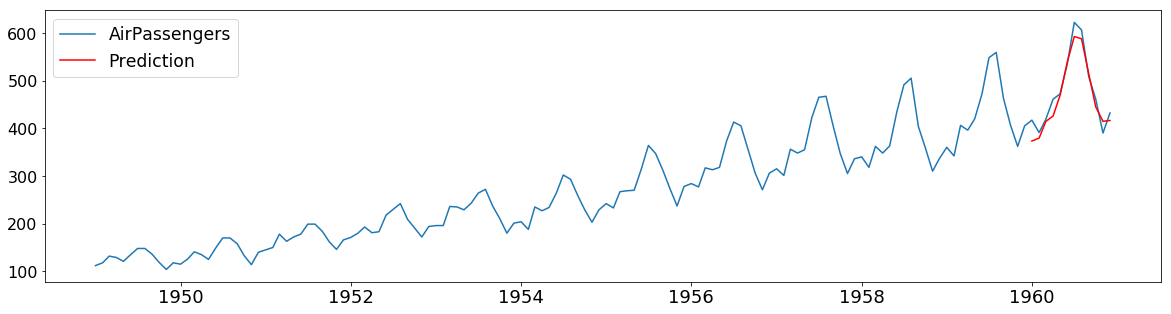

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPassengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [14]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [21.85449131]


In [16]:
train = df

In [17]:
scaler.fit(train)
train = scaler.transform(train)

In [18]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [19]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
22/22 [==============================] - 1s 23ms/step - loss: 0.0018
Epoch 2/90
22/22 [==============================] - 1s 28ms/step - loss: 0.0018
Epoch 3/90
22/22 [==============================] - 1s 29ms/step - loss: 0.0016
Epoch 4/90
22/22 [==============================] - 1s 28ms/step - loss: 0.0015
Epoch 5/90
22/22 [==============================] - 1s 33ms/step - loss: 0.0013
Epoch 6/90
22/22 [==============================] - 1s 32ms/step - loss: 0.0017
Epoch 7/90
22/22 [==============================] - 1s 27ms/step - loss: 0.0016
Epoch 8/90
22/22 [==============================] - 1s 33ms/step - loss: 0.0013
Epoch 9/90
22/22 [==============================] - 1s 31ms/step - loss: 0.0021
Epoch 10/90
22/22 [==============================] - 1s 28ms/step - loss: 0.0019
Epoch 11/90
22/22 [==============================] - 1s 31ms/step - loss: 0.0014
Epoch 12/90
22/22 [==============================] - 1s 28ms/step - loss: 0.0021
Epoch 13/90
22/22 [==================

In [21]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [ ]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [22]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

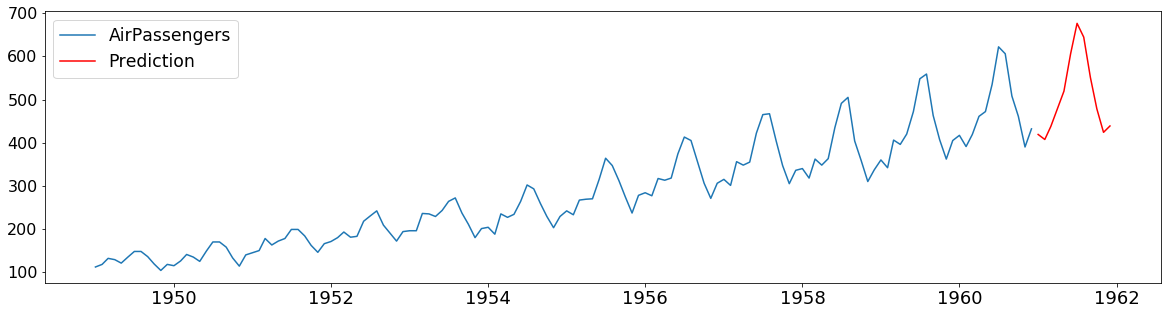

In [29]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['AirPassengers'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()